In [6]:
import pandas as pd
import numpy as np

def load_data_sets(prefix=''):
    if prefix != '':
        prefix += '-'

    print('Loading training set...', end='')
    X_train = pd.read_csv(f'./datasets/{prefix}X_train.csv')
    y_train = pd.read_csv(f'./datasets/{prefix}y_train.csv')
    print('Done!')

    print('Loading validation set...', end='')
    X_val = pd.read_csv(f'./datasets/{prefix}X_val.csv')
    y_val = pd.read_csv(f'./datasets/{prefix}y_val.csv')
    print('Done!')

    print('Loading test set...', end='')
    X_test = pd.read_csv(f'./datasets/{prefix}X_test.csv')
    y_test = pd.read_csv(f'./datasets/{prefix}y_test.csv')
    print('Done!')

    return X_train, y_train, X_val, y_val, X_test, y_test


In [7]:
''' The datasets without normalisation and standardisation '''
X_train_resam, y_train_resam, X_val_resam, y_val_resam, X_test_resam, y_test_resam = load_data_sets('resam')

Loading training set...Done!
Loading validation set...Done!
Loading test set...Done!


In [8]:
''' The datasets with normalisation and standardisation '''
X_train, y_train, X_val, y_val, X_test, y_test = load_data_sets()

Loading training set...Done!
Loading validation set...Done!
Loading test set...Done!


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score

def train(data, label, num_trees_list, max_depth_list, model=None):
    """
    Trains an XGBoost model with grid search for max_depth and num_trees_list.

    Parameters:
        data: Training features.
        label: Training labels.
        X_val: Validation features.
        y_val: Validation labels.
        num_trees_list: List of number of trees to test.
        max_depth_list: List of max_depth values to test.
        model: Optional pre-trained model.

    Returns:
        best_classifier: Best trained XGBoost model.
        best_evals_result: Training and validation results for best model.
        max_acc: Best accuracy score.
        best_params: Best hyperparameters.
    """

    dtrain = xgb.DMatrix(data, label)
    dval = xgb.DMatrix(X_val, y_val)
    evallist = [(dtrain, 'train'), (dval, 'eval')]

    max_acc = 0
    best_classifier = None
    best_evals_result = {}
    best_params = {}

    for max_depth in max_depth_list: 
        for num_trees in num_trees_list: 
            print('#' * 20)
            print(f"Training with max_depth = {max_depth}, num_boost_round = {num_trees}")
            print('-' * 20)
            
            params = {
                'tree_method': 'hist',  
                'objective': 'binary:hinge', 
                'booster': 'gbtree',
                'eta': 0.05,
                'subsample': 0.8,
                'max_depth': max_depth  
            }
            
            evals_result = {}

            bst = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_trees, 
                            evals=evallist, evals_result=evals_result, xgb_model=model)

            y_pred = bst.predict(dval).astype(int)
            acc = accuracy_score(y_val.to_numpy(), np.array(y_pred))  

            if acc > max_acc:
                max_acc = acc
                best_classifier = bst
                best_evals_result = evals_result
                best_params = {'num_boost_round': num_trees, 'max_depth': max_depth}

    return best_classifier, best_evals_result, max_acc, best_params


In [14]:
# Define grid search parameters
num_trees_list = [500, 700, 1000]  # Number of trees
max_depth_list = [6, 7, 8]  # Different max depth values to test


best_classifier, evals_result, acc, best_params = train(
    data=X_train_resam, 
    label=y_train_resam,
    num_trees_list = num_trees_list, max_depth_list = max_depth_list
)


####################
Training with max_depth = 6, num_boost_round = 500
--------------------
[0]	train-error:0.33159	eval-error:0.33367
[1]	train-error:0.33122	eval-error:0.33331
[2]	train-error:0.33044	eval-error:0.33209
[3]	train-error:0.33013	eval-error:0.33133
[4]	train-error:0.32909	eval-error:0.33039
[5]	train-error:0.32918	eval-error:0.33049
[6]	train-error:0.32901	eval-error:0.33028
[7]	train-error:0.32907	eval-error:0.33037
[8]	train-error:0.32900	eval-error:0.33028
[9]	train-error:0.33073	eval-error:0.33131
[10]	train-error:0.32874	eval-error:0.32984
[11]	train-error:0.32872	eval-error:0.32983
[12]	train-error:0.32878	eval-error:0.32990
[13]	train-error:0.32909	eval-error:0.33021
[14]	train-error:0.32915	eval-error:0.33024
[15]	train-error:0.33112	eval-error:0.33165
[16]	train-error:0.32904	eval-error:0.33020
[17]	train-error:0.32906	eval-error:0.33019
[18]	train-error:0.32903	eval-error:0.33017
[19]	train-error:0.32901	eval-error:0.33014
[20]	train-error:0.32899	eval-error:0

In [15]:
print(f"Best Hyperparameters: {best_params}")
print(f" Best Accuracy: {round(acc * 100, 2)}%")

Best Hyperparameters: {'num_boost_round': 1000, 'max_depth': 8}
 Best Accuracy: 71.79%


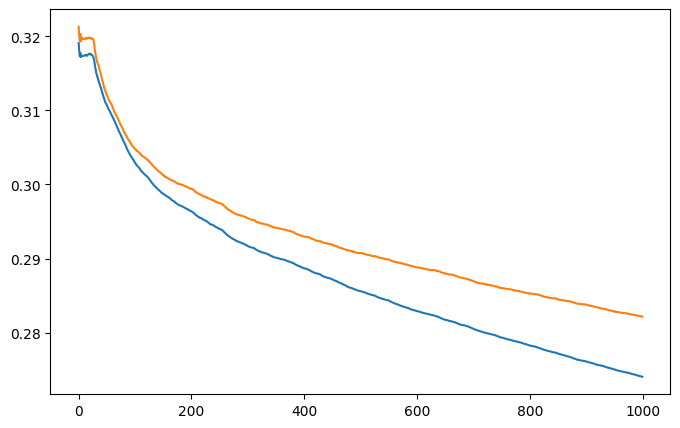

In [16]:
plot_error_curves(evals_result)

In [22]:
# Define grid search parameters
num_trees_list = [500, 700, 1000]  # Number of trees
max_depth_list = [6, 7, 8]  # Different max depth values to test


best_classifier, evals_result, accnorm, best_params_norm = train(
    data=X_train, 
    label=y_train,
    num_trees_list = num_trees_list, max_depth_list = max_depth_list
)


####################
Training with max_depth = 6, num_boost_round = 500
--------------------
[0]	train-error:0.33159	eval-error:0.33367
[1]	train-error:0.33122	eval-error:0.33332
[2]	train-error:0.33044	eval-error:0.33209
[3]	train-error:0.33013	eval-error:0.33132
[4]	train-error:0.32910	eval-error:0.33040
[5]	train-error:0.32918	eval-error:0.33049
[6]	train-error:0.32901	eval-error:0.33028
[7]	train-error:0.32907	eval-error:0.33037
[8]	train-error:0.32900	eval-error:0.33028
[9]	train-error:0.33073	eval-error:0.33131
[10]	train-error:0.32874	eval-error:0.32984
[11]	train-error:0.32871	eval-error:0.32983
[12]	train-error:0.32878	eval-error:0.32989
[13]	train-error:0.32909	eval-error:0.33021
[14]	train-error:0.32914	eval-error:0.33023
[15]	train-error:0.33112	eval-error:0.33165
[16]	train-error:0.32904	eval-error:0.33020
[17]	train-error:0.32905	eval-error:0.33019
[18]	train-error:0.32903	eval-error:0.33016
[19]	train-error:0.32901	eval-error:0.33014
[20]	train-error:0.32899	eval-error:0

In [24]:


print(f"Best Hyperparameters (Normalized data): {best_params_norm}")
print(f" Best Accuracy (Normalized data): {round(accnorm * 100, 2)}%")


Best Hyperparameters (Normalized data): {'num_boost_round': 1000, 'max_depth': 8}
 Best Accuracy (Normalized data): 71.79%


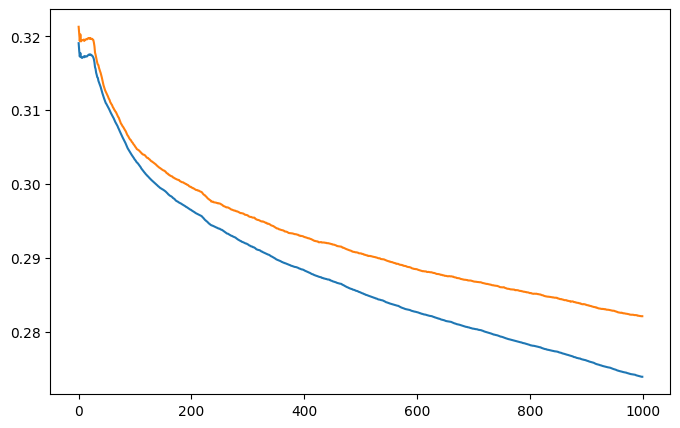

In [27]:
plot_error_curves(evals_result)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

def evaluate_xgboost(model, X_test, y_test):
    """
    Evaluate an XGBoost model trained with `binary:hinge` and correctly compute ROC.
    
    Parameters:
        model: Trained XGBoost model.
        X_test: Test dataset.
        y_test: True labels.
    """
    dtest = xgb.DMatrix(X_test)

    y_pred_score = model.predict(dtest, output_margin=True)  

    # Convert decision function scores to binary predictions
    y_pred = (y_pred_score >= 0).astype(int)  

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {round(acc * 100, 2)}%")

    # Classification Report
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative (0)", "Positive (1)"], yticklabels=["Negative (0)", "Positive (1)"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # ROC Curve 
    fpr, tpr, _ = roc_curve(y_test, y_pred_score)
    auc_score = auc(fpr, tpr)

    print(f"AUC Score: {round(auc_score, 3)}")

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="blue", label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guessing line
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


 Accuracy: 71.79%

 Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.74      0.71    764921
         1.0       0.75      0.70      0.73    868838

    accuracy                           0.72   1633759
   macro avg       0.72      0.72      0.72   1633759
weighted avg       0.72      0.72      0.72   1633759



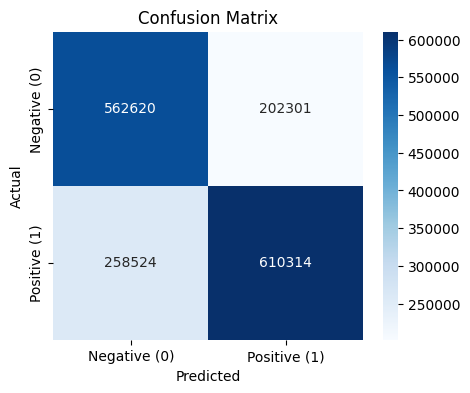

AUC Score: 0.798


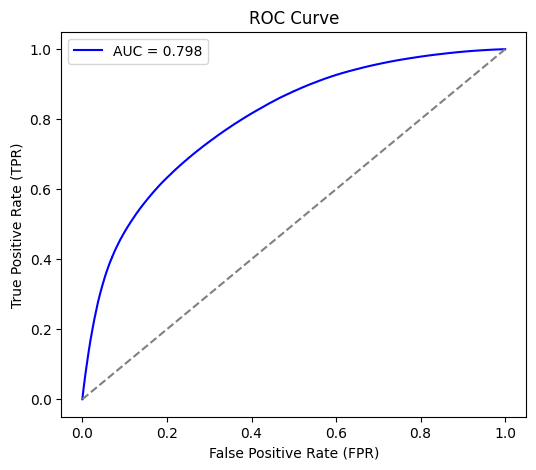

In [29]:
evaluate_xgboost(best_classifier, X_test, y_test)
